In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import io

In [5]:
# Dataset paths
train_data_dir = "./Face Mask Dataset/Train"
test_data_dir = "./Face Mask Dataset/Test"
validation_data_dir = "./Face Mask Dataset/Validation"
categories = ["WithMask", "WithoutMask"]

In [6]:
text_path = "./Models.txt"

In [7]:
# Load images and labels
def load_data(data_dir, categories):
    data = []
    labels = []
    for label, category in enumerate(categories):
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            try:
                img = cv2.resize(img, (128, 128))  # Resize to 128x128
                data.append(img)
                labels.append(label)
            except:
                pass
    return np.array(data), np.array(labels)

In [19]:
X_train, y_train = load_data(train_data_dir, categories)
X_train = X_train / 255.0  # Normalize images
y_train = to_categorical(y_train, num_classes=2)

In [20]:
X_validation, y_validation = load_data(validation_data_dir, categories)
X_validation = X_validation / 255.0  # Normalize images
y_validation = to_categorical(y_validation, num_classes=2)

In [21]:
X_test, y_test = load_data(test_data_dir, categories)
X_test = X_test / 255.0  # Normalize images
y_test = to_categorical(y_test, num_classes=2)

In [22]:
def build_model(k_size, filter_1, filter_2, filter_3, stride, drop_1, drop_2, drop_3, drop_4, dense_n, learning_rate):
    model = Sequential([
        Conv2D(filter_1, (k_size, k_size), strides = stride, activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Dropout(drop_1),
        
        Conv2D(filter_2, (k_size, k_size), strides = stride, activation='relu'),
        BatchNormalization(),
        Dropout(drop_2),
        
        Conv2D(filter_3, (k_size, k_size), strides = stride, activation='relu'),
        BatchNormalization(),
        Dropout(drop_3),
        
        Flatten(),
        Dropout(drop_4),
        Dense(dense_n, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Learning Rate

In [9]:
model = build_model(3, 32, 64, 128, 2, 0.25, 0.25, 0.25, 0.5, 256, 0.0001)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_validation, y_validation),  
    verbose=1
)

/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-17 05:16:10.338568: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 775ms/step - accuracy: 0.8447 - loss: 0.5826 - val_accuracy: 0.5000 - val_loss: 0.8537
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 754ms/step - accuracy: 0.9571 - loss: 0.1320 - val_accuracy: 0.5225 - val_loss: 0.8611
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 737ms/step - accuracy: 0.9703 - loss: 0.0976 - val_accuracy: 0.5250 - val_loss: 1.1915
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 740ms/step - accuracy: 0.9747 - loss: 0.0770 - val_accuracy: 0.6650 - val_loss: 0.7763
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 735ms/step - accuracy: 0.9793 - loss: 0.0618 - val_accuracy: 0.7437 - val_loss: 0.6203
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 731ms/step - accuracy: 0.9836 - loss: 0.0504 - val_accuracy: 0.7825 - val_loss: 0.6327
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 742ms/step - accuracy: 0.9866 - loss: 0.0395 - val_accuracy: 0.8188 - val_loss: 0.4649
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 737ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accu

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8184 - loss: 0.4739


In [14]:
learning_rate = [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]

In [24]:
%%time

for i in learning_rate:
    print("Learning Rate : ", i,"\n")
    model = build_model(3, 32, 64, 128, 2, 0.25, 0.25, 0.25, 0.5, 256, i)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=256,
        validation_data=(X_validation, y_validation),  
        verbose=1
    )

    print()
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print()
    
    with open("./Models.txt", 'a') as file:
    # Save the model summary
        file.write("Model Summary:\n")
    
    # Capture the model summary using a buffer
        summary_buf = io.StringIO()
        model.summary(print_fn=lambda x: summary_buf.write(x + "\n"))
        model_summary = summary_buf.getvalue()
        file.write(model_summary + "\n")
    
    # Save the final test metrics
        file.write("Final Test Results:\n")
        file.write(f"  Test Loss: {test_loss:.4f}\n")
        file.write(f"  Test Accuracy: {test_accuracy:.4f}\n\n")
        
        # Save epoch-wise training and validation metrics
        file.write("Epoch-wise Training and Validation Metrics:\n")
    
    # Get the epoch-wise training and validation metrics from history
        for epoch in range(len(history.history['accuracy'])):
            train_loss = history.history['loss'][epoch]
            train_accuracy = history.history['accuracy'][epoch]
            val_loss = history.history['val_loss'][epoch]
            val_accuracy = history.history['val_accuracy'][epoch]
            
            file.write(f"Epoch {epoch + 1}:\n")
            file.write(f"  Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}\n")
            file.write(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")
        
        file.write("=" * 30 + "\n")  # Separator for clarity between different models

Learning Rate :  10.0 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 751ms/step - accuracy: 0.4864 - loss: 18580640.0000 - val_accuracy: 0.4975 - val_loss: 1912586240000.0000
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 760ms/step - accuracy: 0.4932 - loss: 0.9095 - val_accuracy: 0.4737 - val_loss: 47299788800.0000
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 773ms/step - accuracy: 0.5076 - loss: 0.7335 - val_accuracy: 0.5000 - val_loss: 1506799616.0000
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 763ms/step - accuracy: 0.4965 - loss: 0.7080 - val_accuracy: 0.5088 - val_loss: 7366118.5000
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 765ms/step - accuracy: 0.5007 - loss: 0.8424 - val_accuracy: 0.5000 - val_loss: 0.7767
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 760ms/step - accuracy: 0.4951 - loss: 0.7498 - val_accuracy: 0.5000 - val_loss: 0.7998
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 757ms/step - accuracy: 0.4996 - loss: 0.7369 - val_accuracy: 0.5000 - val_loss: 1.5031
Epoch 8/20
40/40 ━━━━━━━━━━━━

Learning Rate :  1.0 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 787ms/step - accuracy: 0.4976 - loss: 29593.7930 - val_accuracy: 0.5000 - val_loss: 0.7069
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 752ms/step - accuracy: 0.4959 - loss: 0.7019 - val_accuracy: 0.5000 - val_loss: 0.7031
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 788ms/step - accuracy: 0.4936 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 767ms/step - accuracy: 0.4934 - loss: 0.7043 - val_accuracy: 0.5000 - val_loss: 0.7037
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 760ms/step - accuracy: 0.4981 - loss: 0.7020 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 772ms/step - accuracy: 0.5012 - loss: 0.6999 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 748ms/step - accuracy: 0.4979 - loss: 0.7026 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 775ms/step - accuracy: 0.498

Learning Rate :  0.1 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 789ms/step - accuracy: 0.6743 - loss: 163.9606 - val_accuracy: 0.5000 - val_loss: 250203.9219
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 765ms/step - accuracy: 0.6852 - loss: 0.6287 - val_accuracy: 0.4975 - val_loss: 39287.7188
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 784ms/step - accuracy: 0.7483 - loss: 0.5709 - val_accuracy: 0.5738 - val_loss: 691.9372
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 788ms/step - accuracy: 0.7965 - loss: 0.5013 - val_accuracy: 0.5000 - val_loss: 11.0833
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 761ms/step - accuracy: 0.6087 - loss: 0.5933 - val_accuracy: 0.8087 - val_loss: 1.8305
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 788ms/step - accuracy: 0.7601 - loss: 0.4805 - val_accuracy: 0.7613 - val_loss: 0.5075
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 773ms/step - accuracy: 0.7231 - loss: 0.6181 - val_accuracy: 0.6375 - val_loss: 0.5939
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 786ms/step - accur

Learning Rate :  0.01 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 776ms/step - accuracy: 0.7648 - loss: 15.0101 - val_accuracy: 0.4875 - val_loss: 109.3752
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 786ms/step - accuracy: 0.9181 - loss: 0.3456 - val_accuracy: 0.6700 - val_loss: 4.6609
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 761ms/step - accuracy: 0.9435 - loss: 0.2230 - val_accuracy: 0.8100 - val_loss: 0.4880
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 767ms/step - accuracy: 0.9479 - loss: 0.1658 - val_accuracy: 0.5150 - val_loss: 1.0494
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 770ms/step - accuracy: 0.9659 - loss: 0.1072 - val_accuracy: 0.7437 - val_loss: 0.6219
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 775ms/step - accuracy: 0.9229 - loss: 1.1165 - val_accuracy: 0.5700 - val_loss: 33.5007
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 761ms/step - accuracy: 0.9358 - loss: 0.6393 - val_accuracy: 0.6050 - val_loss: 42.1846
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 776ms/step - accuracy: 0.9

Learning Rate :  0.001 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 804ms/step - accuracy: 0.8756 - loss: 0.8797 - val_accuracy: 0.5450 - val_loss: 0.7477
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 766ms/step - accuracy: 0.9673 - loss: 0.1512 - val_accuracy: 0.4975 - val_loss: 0.8007
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 762ms/step - accuracy: 0.9780 - loss: 0.0853 - val_accuracy: 0.5000 - val_loss: 2.1839
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 753ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.4988 - val_loss: 2.7704
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 754ms/step - accuracy: 0.9794 - loss: 0.0825 - val_accuracy: 0.7700 - val_loss: 0.5453
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 762ms/step - accuracy: 0.9901 - loss: 0.0342 - val_accuracy: 0.8888 - val_loss: 0.3324
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 766ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.8413 - val_loss: 0.5463
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 761ms/step - accuracy: 0.9969 

Learning Rate :  0.0001 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 782ms/step - accuracy: 0.8726 - loss: 0.4440 - val_accuracy: 0.5025 - val_loss: 0.6914
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 771ms/step - accuracy: 0.9669 - loss: 0.0990 - val_accuracy: 0.5050 - val_loss: 0.7101
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 754ms/step - accuracy: 0.9740 - loss: 0.0760 - val_accuracy: 0.5525 - val_loss: 0.6594
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 779ms/step - accuracy: 0.9812 - loss: 0.0521 - val_accuracy: 0.8438 - val_loss: 0.4662
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 742ms/step - accuracy: 0.9850 - loss: 0.0396 - val_accuracy: 0.7113 - val_loss: 0.5708
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 784ms/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.8025 - val_loss: 0.4515
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 758ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.8888 - val_loss: 0.3140
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 775ms/step - accuracy: 0.9904

CPU times: user 1d 10h 38min 51s, sys: 1d 4h 20min 18s, total: 2d 14h 59min 9s
Wall time: 1h 3min 9s


### Kernel Size, No. of filters

In [25]:
kernel_size = [3,5]
filter_set_1 = [32, 64, 128]
filter_set_2 = [64, 128, 256]
filter_set_3 = [32, 64, 64]

In [26]:
%%time

for i in kernel_size:
    print("Kernel_size : ", i,"\n")
    model = build_model(i, filter_set_1[0], filter_set_1[1], filter_set_1[2], 2, 0.25, 0.25, 0.25, 0.5, 256, 0.001)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=256,
        validation_data=(X_validation, y_validation),  
        verbose=1
    )

    print()
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print()
    
    with open("./Models.txt", 'a') as file:
    # Save the model summary
        file.write("Model Summary:\n")
    
    # Capture the model summary using a buffer
        summary_buf = io.StringIO()
        model.summary(print_fn=lambda x: summary_buf.write(x + "\n"))
        model_summary = summary_buf.getvalue()
        file.write(model_summary + "\n")
    
    # Save the final test metrics
        file.write("Final Test Results:\n")
        file.write(f"  Test Loss: {test_loss:.4f}\n")
        file.write(f"  Test Accuracy: {test_accuracy:.4f}\n\n")
        
        # Save epoch-wise training and validation metrics
        file.write("Epoch-wise Training and Validation Metrics:\n")
    
    # Get the epoch-wise training and validation metrics from history
        for epoch in range(len(history.history['accuracy'])):
            train_loss = history.history['loss'][epoch]
            train_accuracy = history.history['accuracy'][epoch]
            val_loss = history.history['val_loss'][epoch]
            val_accuracy = history.history['val_accuracy'][epoch]
            
            file.write(f"Epoch {epoch + 1}:\n")
            file.write(f"  Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}\n")
            file.write(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")
        
        file.write("=" * 30 + "\n")  # Separator for clarity between different models
    

Kernel_size :  3 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 719ms/step - accuracy: 0.8554 - loss: 1.3542 - val_accuracy: 0.5188 - val_loss: 0.6817
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 714ms/step - accuracy: 0.9697 - loss: 0.1560 - val_accuracy: 0.7487 - val_loss: 0.4862
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 710ms/step - accuracy: 0.9715 - loss: 0.1135 - val_accuracy: 0.9050 - val_loss: 0.2964
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 707ms/step - accuracy: 0.9864 - loss: 0.0593 - val_accuracy: 0.8562 - val_loss: 0.4976
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 701ms/step - accuracy: 0.9918 - loss: 0.0328 - val_accuracy: 0.8587 - val_loss: 0.7009
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 699ms/step - accuracy: 0.9940 - loss: 0.0197 - val_accuracy: 0.8800 - val_loss: 0.7667
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 703ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9087 - val_loss: 0.4679
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 702ms/step - accuracy: 0.9888 - loss

Kernel_size :  5 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 828ms/step - accuracy: 0.8734 - loss: 0.9911 - val_accuracy: 0.7975 - val_loss: 0.6100
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 818ms/step - accuracy: 0.9768 - loss: 0.0968 - val_accuracy: 0.7150 - val_loss: 0.7101
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 817ms/step - accuracy: 0.9893 - loss: 0.0401 - val_accuracy: 0.8900 - val_loss: 0.3985
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 824ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.7788 - val_loss: 0.7564
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 811ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9062 - val_loss: 0.8569
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 814ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.8363 - val_loss: 1.7636
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 823ms/step - accuracy: 0.9973 - loss: 0.0065 - val_accuracy: 0.8450 - val_loss: 1.9042
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 829ms/step - accuracy: 0.9980 - loss

CPU times: user 13h 24min 8s, sys: 10h 32min 27s, total: 23h 56min 36s
Wall time: 20min 40s


In [27]:
%%time

for i in kernel_size:
    print("Kernel_size : ", i,"\n")
    model = build_model(i, filter_set_2[0], filter_set_2[1], filter_set_2[2], 2, 0.25, 0.25, 0.25, 0.5, 256, 0.001)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=256,
        validation_data=(X_validation, y_validation),  
        verbose=1
    )

    print()
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print()
    
    with open("./Models.txt", 'a') as file:
    # Save the model summary
        file.write("Model Summary:\n")
    
    # Capture the model summary using a buffer
        summary_buf = io.StringIO()
        model.summary(print_fn=lambda x: summary_buf.write(x + "\n"))
        model_summary = summary_buf.getvalue()
        file.write(model_summary + "\n")
    
    # Save the final test metrics
        file.write("Final Test Results:\n")
        file.write(f"  Test Loss: {test_loss:.4f}\n")
        file.write(f"  Test Accuracy: {test_accuracy:.4f}\n\n")
        
        # Save epoch-wise training and validation metrics
        file.write("Epoch-wise Training and Validation Metrics:\n")
    
    # Get the epoch-wise training and validation metrics from history
        for epoch in range(len(history.history['accuracy'])):
            train_loss = history.history['loss'][epoch]
            train_accuracy = history.history['accuracy'][epoch]
            val_loss = history.history['val_loss'][epoch]
            val_accuracy = history.history['val_accuracy'][epoch]
            
            file.write(f"Epoch {epoch + 1}:\n")
            file.write(f"  Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}\n")
            file.write(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")
        
        file.write("=" * 30 + "\n")  # Separator for clarity between different models
    

Kernel_size :  3 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8815 - loss: 1.0110 - val_accuracy: 0.8888 - val_loss: 0.5127
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9770 - loss: 0.1218 - val_accuracy: 0.5000 - val_loss: 2.2144
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9783 - loss: 0.1043 - val_accuracy: 0.5038 - val_loss: 1.6969
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9897 - loss: 0.0315 - val_accuracy: 0.6388 - val_loss: 1.6898
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9919 - loss: 0.0242 - val_accuracy: 0.6637 - val_loss: 1.6873
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.7975 - val_loss: 1.0182
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9967 - loss: 0.0082 - val_accuracy: 0.7513 - val_loss: 3.0256
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy:

Kernel_size :  5 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.8627 - loss: 1.5434 - val_accuracy: 0.7000 - val_loss: 1.4110
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.9677 - loss: 0.2213 - val_accuracy: 0.8388 - val_loss: 1.7173
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9779 - loss: 0.0971 - val_accuracy: 0.5088 - val_loss: 8.1611
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9830 - loss: 0.0626 - val_accuracy: 0.6325 - val_loss: 10.3020
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9872 - loss: 0.0490 - val_accuracy: 0.8788 - val_loss: 0.8543
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9918 - loss: 0.0321 - val_accuracy: 0.8863 - val_loss: 2.5319
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9038 - val_loss: 1.4795
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9890 - loss: 0.0489 - val_accu

CPU times: user 1d 9h 42min 45s, sys: 1d 7h 18min 6s, total: 2d 17h 51s
Wall time: 53min 53s


In [28]:
%%time

for i in kernel_size:
    print("Kernel_size : ", i,"\n")
    model = build_model(i, filter_set_3[0], filter_set_3[1], filter_set_3[2], 2, 0.25, 0.25, 0.25, 0.5, 256, 0.001)

    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=256,
        validation_data=(X_validation, y_validation),  
        verbose=1
    )

    print()
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print()
    
    with open("./Models.txt", 'a') as file:
    # Save the model summary
        file.write("Model Summary:\n")
    
    # Capture the model summary using a buffer
        summary_buf = io.StringIO()
        model.summary(print_fn=lambda x: summary_buf.write(x + "\n"))
        model_summary = summary_buf.getvalue()
        file.write(model_summary + "\n")
    
    # Save the final test metrics
        file.write("Final Test Results:\n")
        file.write(f"  Test Loss: {test_loss:.4f}\n")
        file.write(f"  Test Accuracy: {test_accuracy:.4f}\n\n")
        
        # Save epoch-wise training and validation metrics
        file.write("Epoch-wise Training and Validation Metrics:\n")
    
    # Get the epoch-wise training and validation metrics from history
        for epoch in range(len(history.history['accuracy'])):
            train_loss = history.history['loss'][epoch]
            train_accuracy = history.history['accuracy'][epoch]
            val_loss = history.history['val_loss'][epoch]
            val_accuracy = history.history['val_accuracy'][epoch]
            
            file.write(f"Epoch {epoch + 1}:\n")
            file.write(f"  Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}\n")
            file.write(f"  Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}\n")
        
        file.write("=" * 30 + "\n")  # Separator for clarity between different models
    

Kernel_size :  3 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 679ms/step - accuracy: 0.8917 - loss: 0.5784 - val_accuracy: 0.5200 - val_loss: 0.7147
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 665ms/step - accuracy: 0.9678 - loss: 0.1382 - val_accuracy: 0.6837 - val_loss: 0.6382
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 668ms/step - accuracy: 0.9840 - loss: 0.0464 - val_accuracy: 0.8888 - val_loss: 0.2784
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 666ms/step - accuracy: 0.9892 - loss: 0.0367 - val_accuracy: 0.6475 - val_loss: 0.8084
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 662ms/step - accuracy: 0.9933 - loss: 0.0177 - val_accuracy: 0.9112 - val_loss: 0.3020
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 670ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.7862 - val_loss: 0.6395
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 669ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accuracy: 0.6700 - val_loss: 1.8002
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 665ms/step - accuracy: 0.9967 - loss

Kernel_size :  5 

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 802ms/step - accuracy: 0.8793 - loss: 0.5460 - val_accuracy: 0.7362 - val_loss: 0.4851
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 790ms/step - accuracy: 0.9734 - loss: 0.1040 - val_accuracy: 0.9287 - val_loss: 0.3160
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 783ms/step - accuracy: 0.9828 - loss: 0.0509 - val_accuracy: 0.8600 - val_loss: 0.3240
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 772ms/step - accuracy: 0.9780 - loss: 0.0742 - val_accuracy: 0.9050 - val_loss: 0.2449
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 777ms/step - accuracy: 0.9901 - loss: 0.0289 - val_accuracy: 0.9212 - val_loss: 0.2472
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 778ms/step - accuracy: 0.9931 - loss: 0.0179 - val_accuracy: 0.8825 - val_loss: 0.4757
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 771ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9262 - val_loss: 0.3520
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 786ms/step - accuracy: 0.9971 - loss

CPU times: user 10h 45min 46s, sys: 10h 5min 7s, total: 20h 50min 54s
Wall time: 19min 35s


### Hyperparameter Tuning

In [10]:
!pip install keras_tuner

In [11]:
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=5,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

In [24]:
%%time

def build_model(hp):
    model = Sequential([
        Conv2D(hp.Choice('filter_1', [32, 64]), (hp.Choice('k_size', [3, 5]), hp.Choice('k_size', [3, 5])), strides=2, activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Dropout(hp.Choice('drop', [0.1, 0.2, 0.3])),
        
        Conv2D(hp.Choice('filter_2', [64, 128]), (hp.Choice('k_size', [3, 5]), hp.Choice('k_size', [3, 5])), strides=2, activation='relu'),
        BatchNormalization(),
        Dropout(hp.Choice('drop', [0.1, 0.2, 0.3])),
        
        Conv2D(hp.Choice('filter_3', [128, 256]), (hp.Choice('k_size', [3, 5]), hp.Choice('k_size', [3, 5])), strides=2, activation='relu'),
        BatchNormalization(),
        Dropout(hp.Choice('drop', [0.1, 0.2, 0.3])),
        
        Flatten(),
        Dropout(hp.Choice('drop_dense', [0.3, 0.4, 0.5])),
        Dense(hp.Choice('dense_n', [64, 128, 256]), activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.001])), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    directory='hyperparam_tuning',
    max_trials=400,
    project_name='mask_detection_tata',
    overwrite=False
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_validation, y_validation),batch_size=256,callbacks=[early_stopping])

Trial 400 Complete [00h 00m 47s]
val_accuracy: 0.9962499737739563

Best val_accuracy So Far: 1.0
Total elapsed time: 7d 18h 23m 27s
CPU times: user 28min 14s, sys: 34min 14s, total: 1h 2min 28s
Wall time: 24min 50s


In [185]:
trials = list(tuner.oracle.trials.items())  # Retrieves all trials
trials.sort()

In [132]:
trial_ids = []
metrics = []

for trial_id, trial in trials[200:301]:
    try:
        metrics.append(trial.metrics.get_last_value('val_accuracy'))
        trial_ids.append(trial_id)
    except:
        pass

max_metric = max(metrics)
max_metric_index = metrics.index(max_metric)

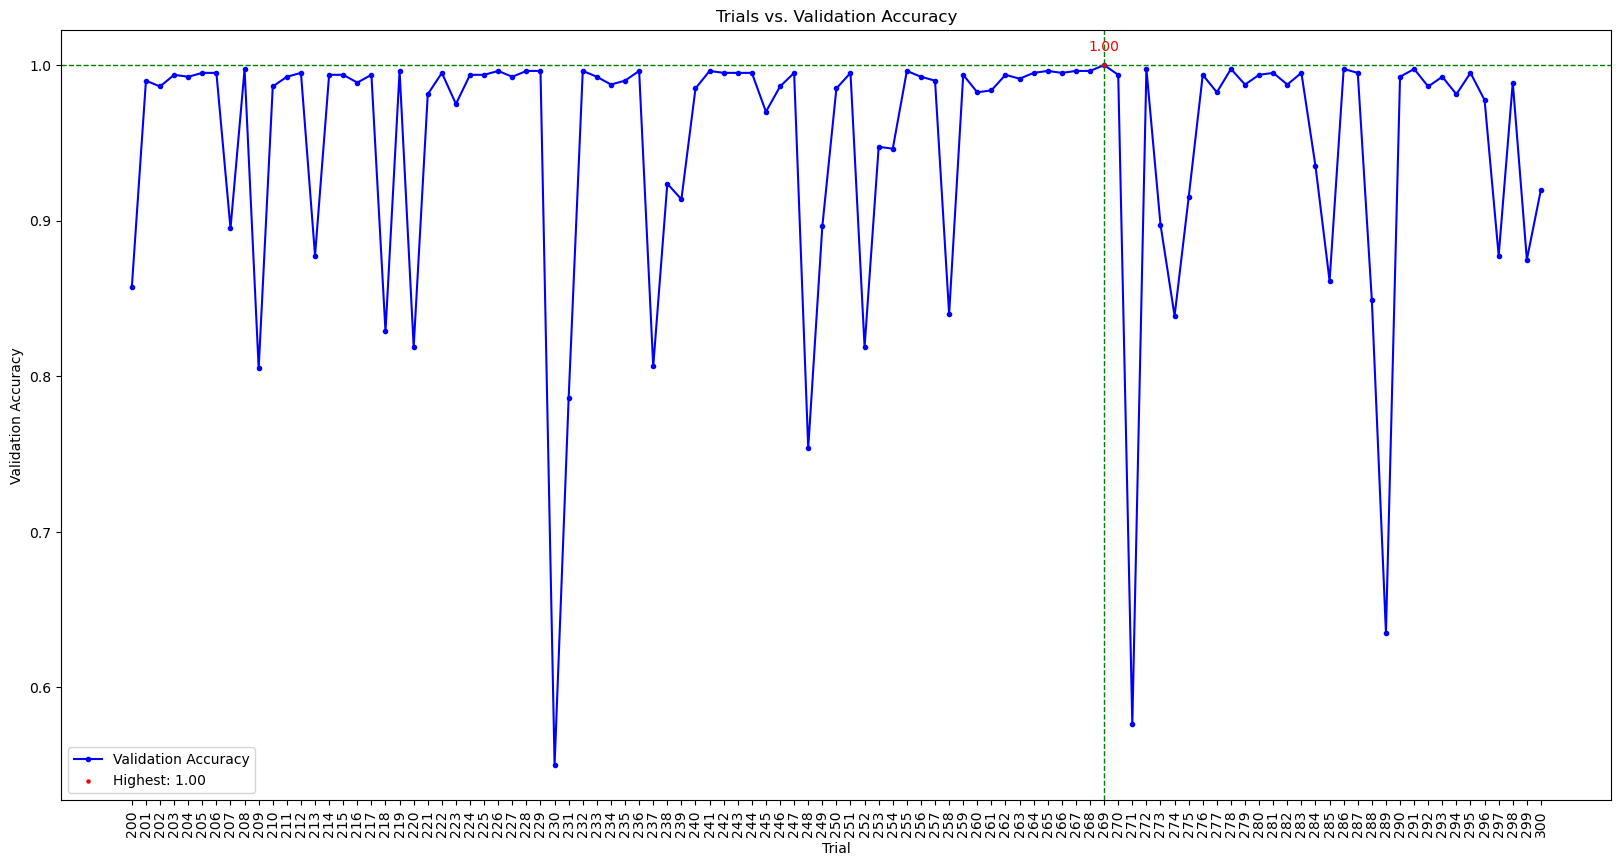

In [200]:
plt.figure(figsize=(20, 10))

plt.plot(trial_ids, metrics, marker='o', markersize=3, linestyle='-', color='b', label='Validation Accuracy')
plt.axhline(y=1, color='green', linestyle='--', linewidth=1)
plt.axvline(x=max_metric_index, color='green', linestyle='--', linewidth=1)
plt.scatter(max_metric_index, max_metric, color='red', s=5, zorder=5, label=f'Highest: {max_metric:.2f}')
plt.annotate(f'{max_metric:.2f}', (max_metric_index , max_metric), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

plt.xlabel('Trial')
plt.ylabel('Validation Accuracy')
plt.title('Trials vs. Validation Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### Model Choosen from HP tuning

In [25]:
def choose_model_from_HP(k_size, filter_1, filter_2, filter_3, drop, dense_drop, dense_n):
    model = Sequential([
        Conv2D(filter_1, (k_size, k_size), strides = 2, activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Dropout(drop),
        
        Conv2D(filter_2, (k_size, k_size), strides = 2, activation='relu'),
        BatchNormalization(),
        Dropout(drop),
        
        Conv2D(filter_3, (k_size, k_size), strides = 2, activation='relu'),
        BatchNormalization(),
        Dropout(drop),
        
        Flatten(),
        Dropout(dense_drop),
        Dense(dense_n, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

In [27]:
best_model_from_hp = choose_model_from_HP(5,32,128,128,0.1,0.5,128)
best_model_from_hp.load_weights("./hyperparam_tuning/mask_detection/trial_269/checkpoint.weights.h5")
best_model_from_hp.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
hpt_val_loss, hpt_val_accuracy = best_model_from_hp.evaluate(X_validation, y_validation)

25/25 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000


In [32]:
hpt_test_loss, hpt_test_accuracy = best_model_from_hp.evaluate(X_test, y_test, verbose=1)

31/31 [==============================] - 0s 6ms/step - loss: 0.0575 - accuracy: 0.9960


In [544]:
best_model_from_hp.save("Face_Mask_Detection.keras")

In [33]:
best_model_from_hp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        2432      
                                                                 
 batch_normalization_6 (Bat  (None, 62, 62, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 128)       102528    
                                                                 
 batch_normalization_7 (Bat  (None, 29, 29, 128)       512       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 29, 29, 128)      

In [34]:
yy_test = np.argmax(y_test,axis=-1)

In [35]:
yy_pred_hpt = best_model_from_hp.predict(X_test)
yyy_pred_hpt = np.argmax(yy_pred_hpt,axis=-1)

print("Accuracy : ",accuracy_score(yy_test, yyy_pred_hpt))

31/31 [==============================] - 1s 4ms/step
Accuracy :  0.9959677419354839


In [36]:
print(classification_report(yy_test,yyy_pred_hpt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992



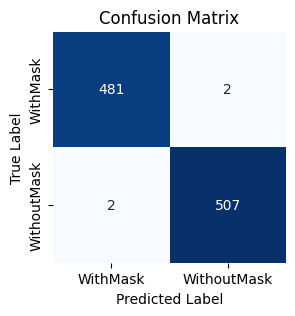

In [37]:
cm_hpt = confusion_matrix(yy_test, yyy_pred_hpt)
plt.figure(figsize=(3,3))
sns.heatmap(cm_hpt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=categories,
            yticklabels=categories)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Modified Architecture 1

In [153]:
def model_1(k_size, filter_1, filter_2, drop, dense_drop, dense_n, learning_rate):
    model = Sequential([
        Conv2D(filter_1, (k_size, k_size), strides = 2, activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Dropout(drop),
        
        Conv2D(filter_2, (k_size, k_size), strides = 2, activation='relu'),
        BatchNormalization(),
        Dropout(drop),
        
        Flatten(),
        Dropout(dense_drop),
        Dense(dense_n, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [154]:
model_1 = model_1(5,32,128,0.1,0.5,128,0.001)

In [155]:
history = model_1.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_validation, y_validation))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.8343 - loss: 4.3524 - val_accuracy: 0.8587 - val_loss: 0.7078
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9663 - loss: 0.1660 - val_accuracy: 0.5238 - val_loss: 0.9736
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9808 - loss: 0.1159 - val_accuracy: 0.5875 - val_loss: 1.3803
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9867 - loss: 0.0799 - val_accuracy: 0.6800 - val_loss: 1.3323
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9832 - loss: 0.0892 - val_accuracy: 0.6988 - val_loss: 1.5707
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9822 - loss: 0.1020 - val_accuracy: 0.7038 - val_loss: 1.7619
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9927 - loss: 0.0333 - val_accuracy: 0.8737 - val_loss: 0.4628
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9856 - loss: 0.0642 - val_accuracy: 0.8975 -

In [157]:
model_1_val_loss, model_1_val_accuracy = model_1.evaluate(X_validation, y_validation)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9936 - loss: 0.0306    


In [158]:
model_1_test_loss, model_1_test_accuracy = model_1.evaluate(X_test, y_test, verbose=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.1107


In [441]:
yy_pred_m1 = model_1.predict(X_test)
yyy_pred_m1 = np.argmax(yy_pred_m1,axis=-1)

print(accuracy_score(yy_test, yyy_pred_m1))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.9828629032258065


In [542]:
print(classification_report(yy_test,yyy_pred_m1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       483
           1       0.99      0.98      0.98       509

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992



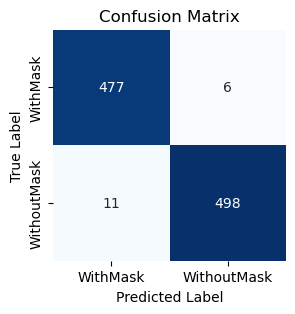

In [442]:
cm_model_1 = confusion_matrix(yy_test, yyy_pred_m1)
plt.figure(figsize=(3,3))
sns.heatmap(cm_model_1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=categories,
            yticklabels=categories)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Modified Architecture 2

In [159]:
def model_2(k_size, filter_1, drop, dense_drop, dense_n, learning_rate):
    model = Sequential([
        Conv2D(filter_1, (k_size, k_size), strides = 2, activation='relu', input_shape=(128, 128, 3)),
        BatchNormalization(),
        Dropout(drop),
        
        Flatten(),
        Dropout(dense_drop),
        Dense(dense_n, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [160]:
model_2 = model_2(5,32,0.1,0.5,128,0.001)

In [161]:
history = model_2.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_validation, y_validation))

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.8136 - loss: 4.9449 - val_accuracy: 0.5612 - val_loss: 1.8519
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9596 - loss: 0.1841 - val_accuracy: 0.8938 - val_loss: 0.3655
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9655 - loss: 0.1758 - val_accuracy: 0.9575 - val_loss: 0.2626
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9793 - loss: 0.0820 - val_accuracy: 0.9725 - val_loss: 0.1936
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9909 - loss: 0.0265 - val_accuracy: 0.9488 - val_loss: 0.1956
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9737 - val_loss: 0.1264
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9812 - val_loss: 0.0901
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9837 - 

In [162]:
model_2_val_loss, model_2_val_accuracy = model_2.evaluate(X_validation, y_validation)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: 1.7287  


In [447]:
model_2_test_loss, model_2_test_accuracy = model_2.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 1.8669  


In [517]:
yy_pred_m2 = model_2.predict(X_test)
yyy_pred_m2 = np.argmax(yy_pred_m2,axis=-1)

print(accuracy_score(yy_test, yyy_pred_m2))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
0.8911290322580645


In [543]:
print(classification_report(yy_test,yyy_pred_m2))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       483
           1       0.99      0.80      0.88       509

    accuracy                           0.89       992
   macro avg       0.90      0.89      0.89       992
weighted avg       0.91      0.89      0.89       992



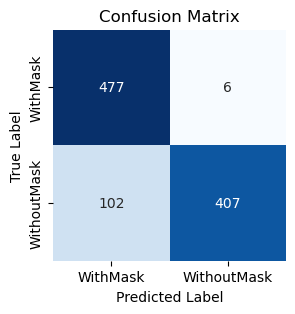

In [518]:
cm_model_2 = confusion_matrix(yy_test, yyy_pred_m2)
plt.figure(figsize=(3,3))
sns.heatmap(cm_model_2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=categories,
            yticklabels=categories)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Comparison Model Performance

In [555]:
models   = ["HPT_Model", "Modified_Model_1", "Modified_Model_2"]
val_acc  = [hpt_val_accuracy, model_1_val_accuracy, model_2_val_accuracy]
test_acc = [hpt_test_accuracy, model_1_test_accuracy, model_2_test_accuracy]
bar_width = 0.25
x = np.arange(len(models))

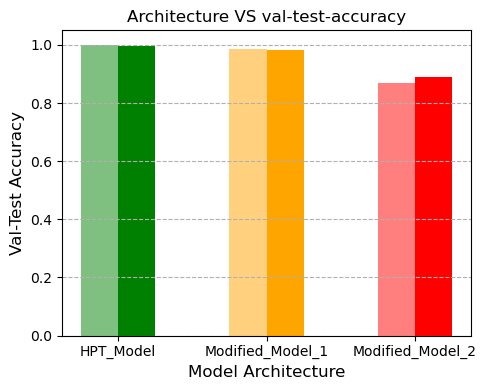

In [556]:
plt.figure(figsize=(5,4))

plt.bar(x, val_acc, width=bar_width, label='Validation Accuracy', color=["green","orange","red"], alpha=0.5)
plt.bar(x+bar_width, test_acc, width=bar_width, label='Test Accuracy', color=["green","orange","red"])

plt.title("Architecture VS val-test-accuracy",fontsize=12)
plt.xlabel("Model Architecture",fontsize=12)
plt.ylabel("Val-Test Accuracy",fontsize=12)
plt.xticks(x+(bar_width/2),models, fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

## Augmenting Data (low lighting conditions)

In [38]:
factors = np.arange(0,1,0.1)

image_withMask = X_test[150]
image_withoutMask = X_test[550]

In [39]:
low_light_images_withMask = []
display_images_withMask   = []

for factor in factors:
    low_light_image = (image_withMask * factor)
    low_light_images_withMask.append(low_light_image)

    low_light_image = (low_light_image*255).astype(dtype="uint8")
    low_light_image = cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB)
    display_images_withMask.append(low_light_image)

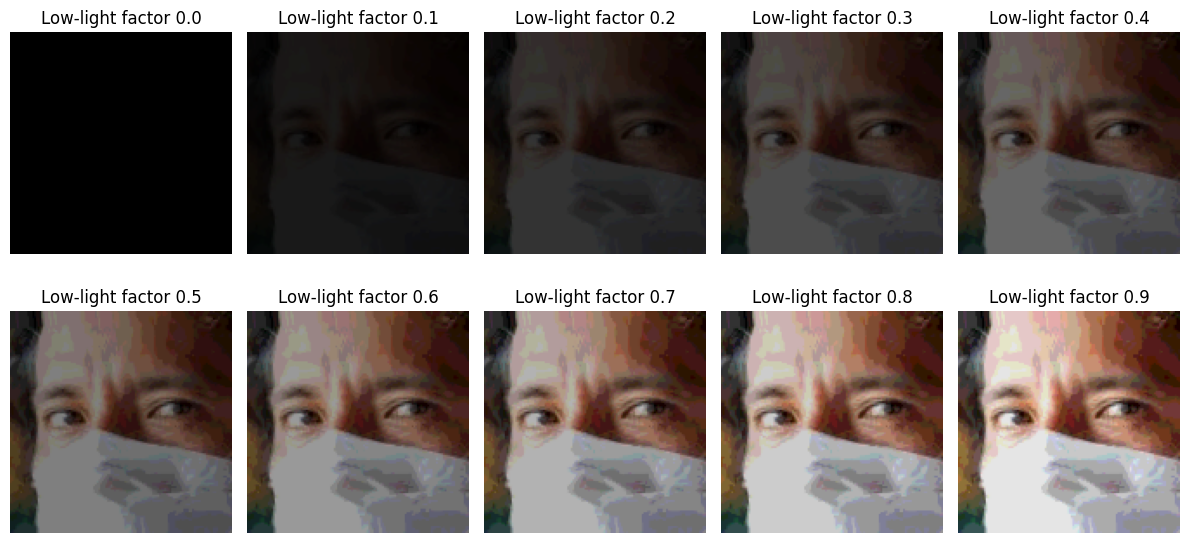

In [40]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(display_images_withMask[i])
    ax.set_title(f'Low-light factor {i/10}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [41]:
for factor, img in zip(factors, low_light_images_withMask):
    pred = best_model_from_hp.predict(np.array([img]), verbose=0)
    cat_index = np.argmax(pred, axis=-1)
    print(f"Factor : {factor:.1f} => ", categories[cat_index[0]])

Factor : 0.0 =>  WithMask
Factor : 0.1 =>  WithMask
Factor : 0.2 =>  WithMask
Factor : 0.3 =>  WithMask
Factor : 0.4 =>  WithMask
Factor : 0.5 =>  WithMask
Factor : 0.6 =>  WithMask
Factor : 0.7 =>  WithMask
Factor : 0.8 =>  WithMask
Factor : 0.9 =>  WithMask


In [42]:
low_light_images_withoutMask = []
display_images_withoutMask   = []

for factor in factors:
    low_light_image = (image_withoutMask * factor)
    low_light_images_withoutMask.append(low_light_image)
    
    low_light_image = (low_light_image*255).astype(dtype="uint8")
    low_light_image = cv2.cvtColor(low_light_image, cv2.COLOR_BGR2RGB)
    display_images_withoutMask.append(low_light_image)

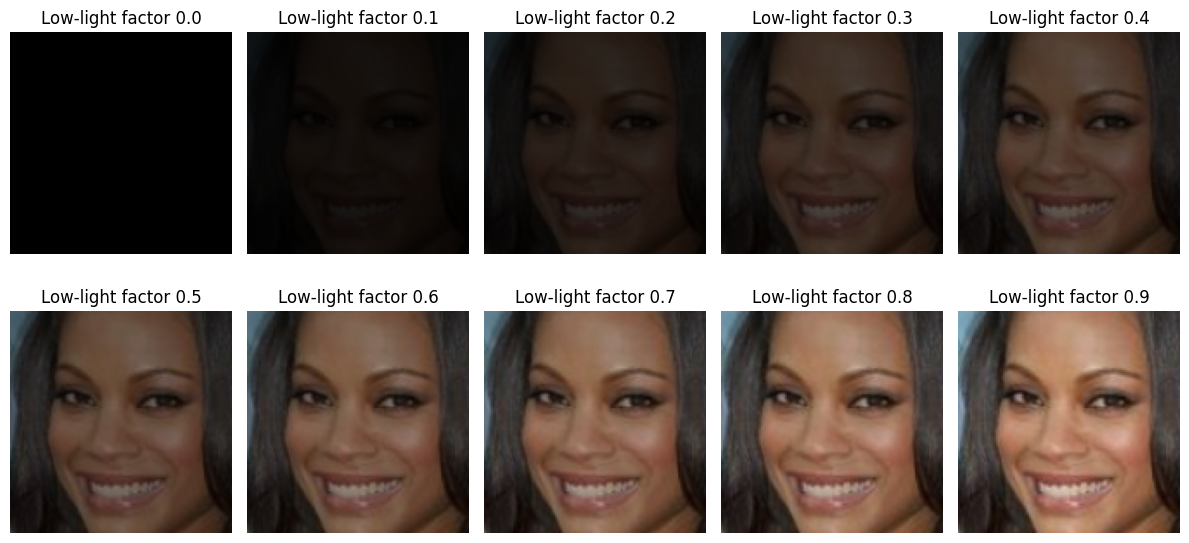

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(display_images_withoutMask[i])
    ax.set_title(f'Low-light factor {i/10}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
for factor, img in zip(factors, low_light_images_withoutMask):
    pred = best_model_from_hp.predict(np.array([img]), verbose=0)
    cat_index = np.argmax(pred, axis=-1)
    print(f"Factor : {factor:.1f} => ", categories[cat_index[0]])

Factor : 0.0 =>  WithMask
Factor : 0.1 =>  WithMask
Factor : 0.2 =>  WithMask
Factor : 0.3 =>  WithoutMask
Factor : 0.4 =>  WithoutMask
Factor : 0.5 =>  WithoutMask
Factor : 0.6 =>  WithoutMask
Factor : 0.7 =>  WithoutMask
Factor : 0.8 =>  WithoutMask
Factor : 0.9 =>  WithoutMask


In [45]:
factors = np.arange(0,1.1,0.1)
low_light_accuracy = []

for factor in factors:
    print(f"Low-Light factor applied : {factor:.1f}")
    low_light_images = X_test * factor
    y_pred = best_model_from_hp.predict(low_light_images, verbose=1)
    yy_pred = np.argmax(y_pred, axis=-1)
    accuracy = accuracy_score(yy_test, yy_pred)
    low_light_accuracy.append(accuracy)
    print("Accuracy : ",accuracy)
    print()

Low-Light factor applied : 0.0
31/31 [==============================] - 0s 4ms/step
Accuracy :  0.48689516129032256

Low-Light factor applied : 0.1
31/31 [==============================] - 0s 4ms/step
Accuracy :  0.48689516129032256

Low-Light factor applied : 0.2
31/31 [==============================] - 0s 5ms/step
Accuracy :  0.5433467741935484

Low-Light factor applied : 0.3
31/31 [==============================] - 0s 4ms/step
Accuracy :  0.90625

Low-Light factor applied : 0.4
31/31 [==============================] - 0s 3ms/step
Accuracy :  0.9465725806451613

Low-Light factor applied : 0.5
31/31 [==============================] - 0s 4ms/step
Accuracy :  0.9657258064516129

Low-Light factor applied : 0.6
31/31 [==============================] - 0s 4ms/step
Accuracy :  0.9758064516129032

Low-Light factor applied : 0.7
31/31 [==============================] - 0s 5ms/step
Accuracy :  0.9828629032258065

Low-Light factor applied : 0.8
31/31 [==============================] - 0s 5ms/st

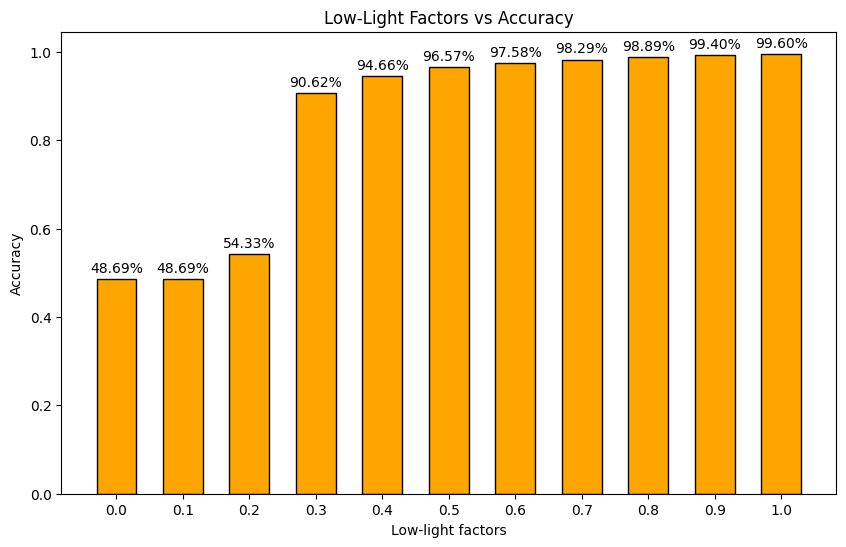

In [46]:
plt.figure(figsize=(10,6))

plt.bar(factors, low_light_accuracy, width=0.06, color='orange', edgecolor='black')

plt.xlabel('Low-light factors')
plt.ylabel('Accuracy')
plt.title('Low-Light Factors vs Accuracy')

for i in range(len(factors)):
    plt.text(factors[i], low_light_accuracy[i] + 0.015, f'{low_light_accuracy[i]*100:.2f}%', ha='center')

plt.xticks(factors)
plt.show()